<a href="https://colab.research.google.com/github/Andru-1987/86400_data_science_i_diplomatura/blob/main/09_fundamentos_de_ia_y_machine_learning/clase_practica/Clase_9_Practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Boston House

In [8]:
import sklearn.datasets as datasets
import pandas as pd

In [22]:
# Buscar como traer estos datos desde la libreria de sklearn
california = datasets.fetch_california_housing(as_frame=True)


In [30]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [36]:
df = california.frame
df["MedHouseVal"] = california.target

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
df.shape

(20640, 9)

In [39]:
df.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**Tarea Grupal**

- Obtener los datos que van a ser utilzados en el proyecto. Donde tenga las variables y su target a predecir.
- Split la data y verificar si hay nulos o repetidos
- Escalar los datos
- Generar un Modelo de regresion lineal y buscar 1 metrica de ese modelo

In [41]:
X = california.data          # DataFrame con 8 features
y = california.target        # Series: MedHouseVal (en cientos de miles de $)

print("Forma de X:", X.shape)      # (20640, 8)
print("Nombre de variables:", list(X.columns))
print("Variable objetivo:", california.target_names[0])
print("Rango de la variable target:", y.min(), "a", y.max(), "(cientos de miles de $)")

Forma de X: (20640, 8)
Nombre de variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Variable objetivo: MedHouseVal
Rango de la variable target: 0.14999 a 5.00001 (cientos de miles de $)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error


In [43]:
# Dividir: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
# Escalado de datos
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


In [47]:
viz_df_cols = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [48]:
viz_df_cols

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
2,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
3,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
4,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551
...,...,...,...,...,...,...,...,...
16507,1.307215,0.507194,0.290620,-0.393391,-0.675847,-0.005588,-0.872016,0.808883
16508,-0.436266,0.348490,0.600411,0.398898,0.287195,0.069722,-0.759688,1.073144
16509,-0.496973,0.586545,-0.606759,-0.039216,0.289833,0.020306,-0.755007,0.599469
16510,0.965450,-1.079841,0.402175,-0.066265,0.308303,0.007076,0.906510,-1.185540


In [50]:
# Modelo
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test_scaled)

In [58]:
viz_df_cols_test = pd.DataFrame(X_test_scaled, columns=X_train.columns)
viz_df_cols_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-1.155085,-0.286324,-0.520686,-0.171746,-0.030301,0.067408,0.195100,0.285347
1,-0.708659,0.110435,-0.165815,0.223472,0.121851,-0.036030,-0.235491,0.060975
2,-0.210402,1.856173,-0.610765,0.205892,-0.102419,-0.149989,1.009478,-1.424870
3,0.975113,-0.921138,0.305115,-0.176552,0.244979,0.030011,-0.637999,0.429943
4,-0.081794,0.427842,0.024193,-0.158465,-0.319653,-0.052971,0.457199,-1.170581
...,...,...,...,...,...,...,...,...
4123,0.380334,-1.000489,0.656380,-0.069975,-0.066360,-0.009330,-1.068590,1.177851
4124,-0.606098,-0.048268,0.291827,0.369465,0.196607,-0.065340,-0.132523,-0.622115
4125,2.809024,-0.286324,0.755012,-0.345109,0.139441,-0.026469,0.780141,-1.230414
4126,-0.575430,0.586545,-0.061243,-0.262147,-0.175417,-0.043905,0.527404,-0.088607


In [52]:
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [59]:
viz_df_cols_test["predicciones"] = y_pred

In [60]:
viz_df_cols_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,predicciones
0,-1.155085,-0.286324,-0.520686,-0.171746,-0.030301,0.067408,0.195100,0.285347,0.719123
1,-0.708659,0.110435,-0.165815,0.223472,0.121851,-0.036030,-0.235491,0.060975,1.764017
2,-0.210402,1.856173,-0.610765,0.205892,-0.102419,-0.149989,1.009478,-1.424870,2.709659
3,0.975113,-0.921138,0.305115,-0.176552,0.244979,0.030011,-0.637999,0.429943,2.838926
4,-0.081794,0.427842,0.024193,-0.158465,-0.319653,-0.052971,0.457199,-1.170581,2.604657
...,...,...,...,...,...,...,...,...,...
4123,0.380334,-1.000489,0.656380,-0.069975,-0.066360,-0.009330,-1.068590,1.177851,1.991746
4124,-0.606098,-0.048268,0.291827,0.369465,0.196607,-0.065340,-0.132523,-0.622115,2.249839
4125,2.809024,-0.286324,0.755012,-0.345109,0.139441,-0.026469,0.780141,-1.230414,4.468770
4126,-0.575430,0.586545,-0.061243,-0.262147,-0.175417,-0.043905,0.527404,-0.088607,1.187511


In [53]:
import numpy as np

In [61]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # versión estable de sklearn >=1.1
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f} (cientos de miles de $) → {mae*100:.1f} k$")
print(f"RMSE: {rmse:.3f} → {rmse*100:.1f} k$")
print(f"MAPE: {mape:.2f} %")
print(f"R²: {r2:.4f}")

MAE: 0.533 (cientos de miles de $) → 53.3 k$
RMSE: 0.746 → 74.6 k$
MAPE: 31.95 %
R²: 0.5758


In [ ]:
# prediccion -> 150_000 USD --> 150_000 USD +/- 53_000 USD

In [62]:
import matplotlib.pyplot as plt

In [64]:
residuos = y_test - y_pred

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

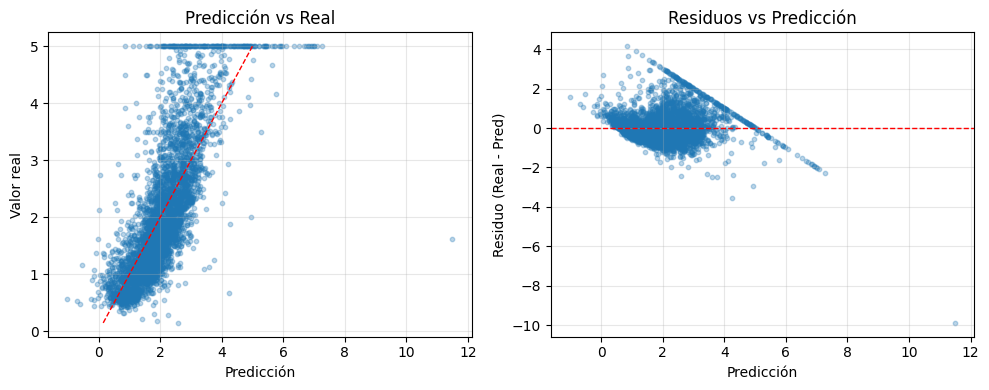

In [67]:
plt.figure(figsize=(10, 4))
# Subplot 1: Predicho vs Real
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_test, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Predicción vs Real')
plt.grid(alpha=0.3)

# Subplot 2: Residuos vs Predicción
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuos, alpha=0.3, s=10)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicción')
plt.ylabel('Residuo (Real - Pred)')
plt.title('Residuos vs Predicción')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Modelo Random Forest básico
rf_baseline = RandomForestRegressor(
    n_estimators=100,    # Número de árboles
    random_state=42,     # Para reproducibilidad
    n_jobs=-1           # Usar todos los cores del CPU
)

rf_baseline.fit(X_train_scaled, y_train)
y_pred_rf = rf_baseline.predict(X_test_scaled)

In [71]:
# Calcular métricas
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print("RANDOM FOREST - RESULTADOS BASELINE")
print(f"MAE: {mae_rf:.3f} → {mae_rf*100:.1f} k$")
print(f"RMSE: {rmse_rf:.3f} → {rmse_rf*100:.1f} k$")
print(f"MAPE: {mape_rf:.2f} %")
print(f"R²: {r2_rf:.4f}")

RANDOM FOREST - RESULTADOS BASELINE
MAE: 0.327 → 32.7 k$
RMSE: 0.505 → 50.5 k$
MAPE: 18.91 %
R²: 0.8053


In [78]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [79]:
score = cross_val_score(rf_baseline, X_train_scaled, y_train, cv=kf, scoring="r2")

In [83]:
print(f"R2 {score.mean():.3f} +/- {score.std():.3f}")


R2 0.805 +/- 0.006


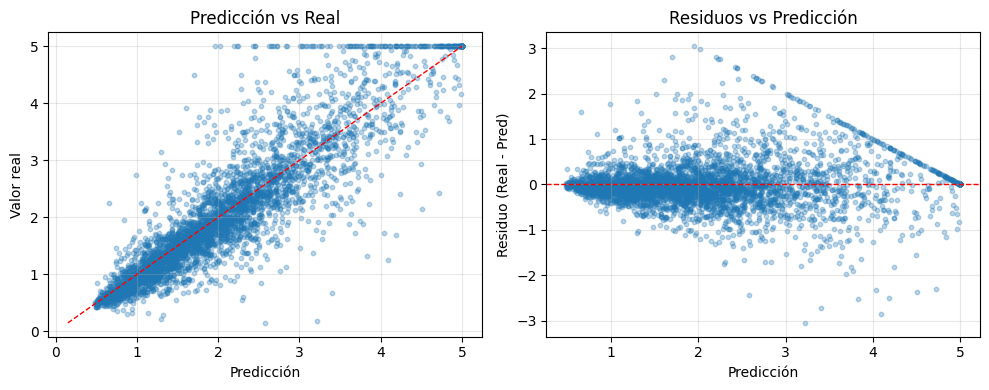

In [73]:
residuos = y_test - y_pred_rf

plt.figure(figsize=(10, 4))

# Subplot 1: Predicho vs Real
plt.subplot(1, 2, 1)
plt.scatter(y_pred_rf, y_test, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=1)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Predicción vs Real')
plt.grid(alpha=0.3)

# Subplot 2: Residuos vs Predicción
plt.subplot(1, 2, 2)
plt.scatter(y_pred_rf, residuos, alpha=0.3, s=10)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicción')
plt.ylabel('Residuo (Real - Pred)')
plt.title('Residuos vs Predicción')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()